TorchVision을 이용한 데이터 증강

In [1]:
# 패키지 임포트
from PIL import Image
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
from matplotlib import pyplot as plt
import cv2
import numpy as np

이미지 데이터 다운로드

In [2]:
# 이미지 데이터 다운로드
!wget https://raw.githubusercontent.com/jetsonai/DeepLearning4Projects/master/Chap3/data.zip

--2024-03-21 01:07:21--  https://raw.githubusercontent.com/jetsonai/DeepLearning4Projects/master/Chap3/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17251 (17K) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  16.85K  --.-KB/s    in 0s      

2024-03-21 01:07:21 (58.4 MB/s) - ‘data.zip’ saved [17251/17251]



In [3]:
#zip 파일 압축풀기
!unzip data.zip -d data

Archive:  data.zip
  inflating: data/cat_2.jpg          


./data/cat_2.jpg


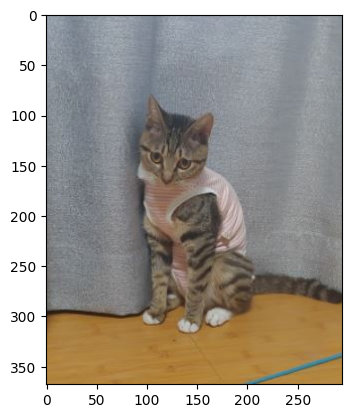

In [4]:
# 이미지 보기
def cv_image_read(image_path):
    print(image_path)
    return cv2.imread(image_path)

def show_image(cv_image):
    rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)
    plt.show()

show_image(cv_image_read('./data/cat_2.jpg'))

In [5]:
# Torchvision 데이터세트 클래스
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = Image.open(file_path)
        # 이미지 변경 수행
        if self.transform:
            image = self.transform(image)
        return image, label

In [6]:
# Torchvision 이미지 변형 (사이즈 변경, 자르기, 수평 뒤집기)
torchvision_transform = transforms.Compose([
    transforms.Resize((220, 220)),
    transforms.RandomCrop(120),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])
# TorchvisionDataset 클래스 객체 생성
torchvision_dataset = TorchvisionDataset(
    file_paths=['./data/cat_2.jpg'],
    labels=[1],
    transform=torchvision_transform,
)

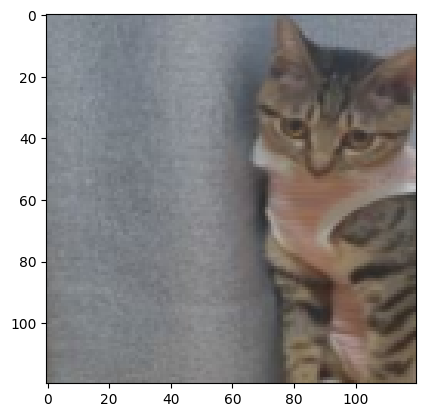

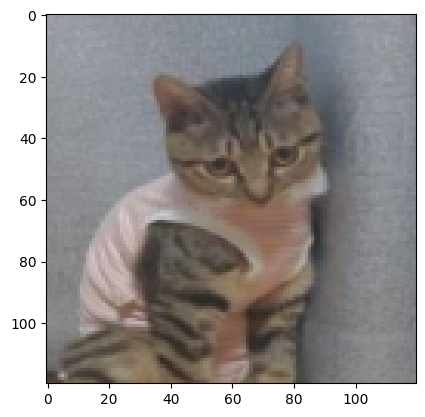

In [7]:
# 랜덤으로 2번 변형 수행
for i in range(2):
  sample, _= torchvision_dataset[0]
  plt.figure()
  plt.imshow(transforms.ToPILImage()(sample))
  plt.show()

Albumentations 패키지를 이용한 데이터 증강

In [8]:
import albumentations
import albumentations.pytorch

In [9]:
# Albumentations 데이터세트 클래스
class AlbumentationsDataset(Dataset):
    """__init__ and __len__ functions are the same as in TorchvisionDataset"""
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]
        # 이미지 읽기
        image = cv2.imread(file_path)
        # BGR opencv 이미지를 RGB 이미지로 변경
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # 이미지 변경 수행
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

In [10]:
# albumentations 이미지 변형 (사이즈 변경, 자르기, 90도 회전, 수평 뒤집기, 가우시안 노이즈)
albumentations_transform = albumentations.Compose([
    albumentations.Resize(220, 220),
    albumentations.RandomCrop(120, 120),
    albumentations.RandomRotate90(p=1),
    albumentations.HorizontalFlip(),
    albumentations.GaussNoise(p=1),
    albumentations.pytorch.transforms.ToTensorV2()
])
#AlbumentationsDataset 클래스 객체 생성
albumentations_dataset = AlbumentationsDataset(
    file_paths=['./data/cat_2.jpg'],
    labels=[1],
    transform=albumentations_transform,
)

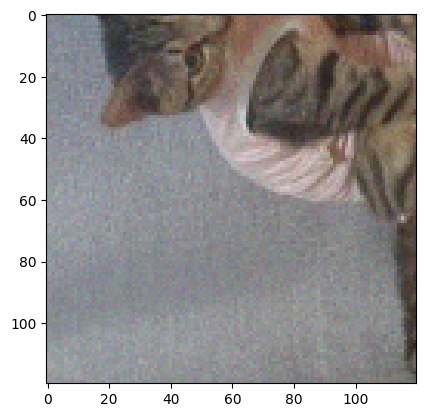

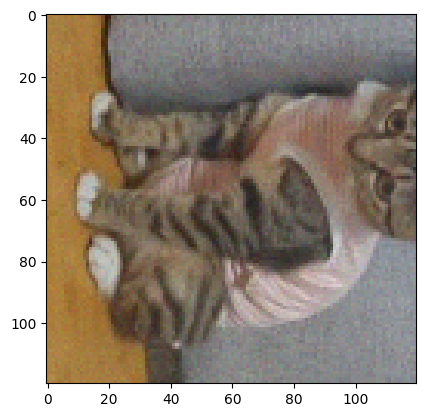

In [11]:
# 랜덤으로 2번 변형 수행
for i in range(2):
  sample, _ = albumentations_dataset[0]

  plt.figure()
  plt.imshow(transforms.ToPILImage()(sample))
  plt.show()